# Gradient Descent/ Método del Gradiente

Una función de costo es una medida de que "tan malo" es nuestro modelo basados en su habilidad para estimar la relación entre $x$ y $y$.

Modelo:  $ f(X) = \hat y $

Valor real: $y$

La función de costo compara $y$ con $\hat y$ para medir el rendimiento del modelo.

Dada una función de costo asociada a un algoritmo de ML, el método del gradiente se implementa para obtener el mínimo de dicha función.

Problema clásico de la pelota oscilando alrededor de una posición de equilibrio.

<img src="Imagenes/g1.jpg">

Versión minimalista del método del gradiente:

* Escoger una posición inicial para la pelota.

* Calcular la pendiente en la posición actual.

* Si la pendiente es negativa, moverse a la derecha.

* Si la pendiente es positiva moverse a la izquierda.

* Repetir hasta alcanzar la posición de equilibrio.

<img src="Imagenes\g2.jpg">

Matemáticamente:

* Escoger $ X^{(0)}$ 
* Calcular la pendiente/gradiente.
* Siguiente punto en la iteración será:  $X^{1} = X^{0} -pendiente $
* Repetir hasta converger a la posición de equilibrio (mínimo): $X^{k+1} = X^{k} -pendiente$ 

El algoritmo nos asegura que, a medida que nos acercamos al mínimo, las pendientes se hacen más y más cercanas a cero por lo que "los pasos" de la pelota también se hacen más pequeños.

¿Qué pasa si la pendiente en el punto es muy grande?

<img src="Imagenes\g3.jpg">

Podemos arreglar este problema multiplicando la pendiente por un *Learning Rate* que reduzca el valor de la pendiente, esto provocará que nuestro método tarde más en converger, pero evitará el problema de las pendientes grandes:

* $ x^{k+1} = x^{k} - \alpha \nabla$ 

¿Qué pasa si tenemos múltiples mínimos locales?

<img src="Imagenes\g5.jpg">

Solución: escoger de forma aleatoria diferentes posiciones iniciales, correr el algoritmo con cada una de ellas y, finalmente, escoger la posición final que haya alcanzado el mínimo global.

<img src="Imagenes\g6.jpg">

¿Por qué usar el método del Gradiente en lugar de encontrar mínimos de funciones de forma analítica?

En *ML* se trabaja con *datsets* de múltiples variables, los algoritmos buscan la optimización de un número enorme de parámetros y dichos sistemas de ecuaciones no sólo son computacionalmente costosos, sino que, además, pueden no tener solución analítica. El método del gradiente aproxima soluciones con un costo computacional bajo.

# Ejemplo con Regresión Lineal y MSE


$\hat y = mx+b$

$ E = \frac{1}{N} \Sigma (y_{i}-(mx_{i}+b))^2 $

Se busca optimizar m y b con base en la función de costo por lo que requerimos sus respectivas derivadas parciales:

$ \frac{\partial}{\partial m} = -\frac{2}{N} \Sigma x_{i} (y_{i}-(mx_{i}+b))  $

$ \frac{\partial}{\partial b} = -\frac{2}{N} \Sigma (y_{i}-(mx_{i}+b))  $

Por último implementaremos la relación de recurrencia:

$ m^{k+1} = m^{k} - \alpha \frac{\partial}{\partial m}|_{m^{k}} $ 

$ b^{k+1} = b^{k} - \alpha \frac{\partial}{\partial b}|_{b^{k}} $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datos/train.csv')

FileNotFoundError: [Errno 2] File b'Datos/train.csv' does not exist: b'Datos/train.csv'

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
X = df.iloc[:,4] #LotArea
y = df.iloc[:,80] # SalePrice

Se estandarizan las variables independientes para optimizar la convergencia del método.

In [5]:
X = (X-X.mean())/X.std()

Implementación del método del gradiente:

In [6]:
# Se incializan m y b

m = 0
b = 0

Number_iterations = 45000
L = 0.0001 
N = len(X)
cost = []

for i in range(0,Number_iterations):
    y_pred = m*X + b
    Dm = (-2/N) * sum(X*(y-y_pred))
    Db = (-2/N) * sum(y-y_pred)
    m = m-(L*Dm)
    b = b-(L*Db)
    E = (1/N) * sum((y-y_pred)**2)
    cost.append(E)

In [7]:
%%time
# Se incializan m y b

m = 0
b = 0

Number_iterations = 45000
L = 0.0001 
N = len(X)
cost = []

for i in range(0,Number_iterations):
    y_pred = m*X + b
    Dm = (-2/N) * sum(X*(y-y_pred))
    Db = (-2/N) * sum(y-y_pred)
    m = m-(L*Dm)
    b = b-(L*Db)
    E = (1/N) * sum((y-y_pred)**2)
    cost.append(E)

Wall time: 1min 55s


In [8]:
print('El valor óptimo para m es: %1.2f' % m)
print('El valor óptimo para b es: %1.2f' % b)
print('El programa tarda en ejecutarse 1min 42s segundos')

El valor óptimo para m es: 20957.78
El valor óptimo para b es: 180898.89
El programa tarda en ejecutarse 1min 42s segundos


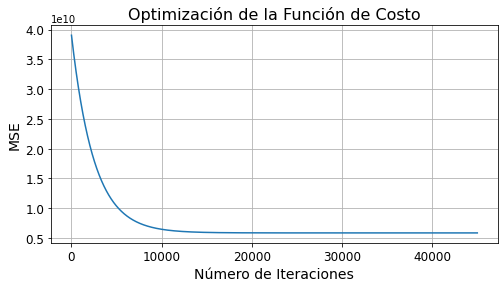

In [9]:
plt.figure(figsize=(8,4))
plt.plot(range(0,Number_iterations), cost)
plt.title('Optimización de la Función de Costo', fontsize = 16)
plt.xlabel('Número de Iteraciones', fontsize = 14)
plt.ylabel('MSE', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

In [10]:
X = np.asarray(X)
y = np.asarray(y)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X, y)

LinearRegression()

In [12]:
print('El valor óptimo para m es: %1.2f' % regressor.coef_)
print('El valor óptimo para b es: %1.2f' % regressor.intercept_)

El valor óptimo para m es: 20960.38
El valor óptimo para b es: 180921.20
